$$\textbf{Chad Schupbach}$$
$$\text{College of Engineering}$$
$$\text{Georgia Institute of Technology}$$

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.transform import resize
from sklearn.cluster import KMeans

In [2]:
plt.style.use('seaborn')

# Image Processing

Here we perform various image analysis techniques using the image `flower.jpg`. We read in the image from the `data` directory and display the image as follows:

In [3]:
img = plt.imread('data/flower.jpg')
m, n = img.shape[:2]

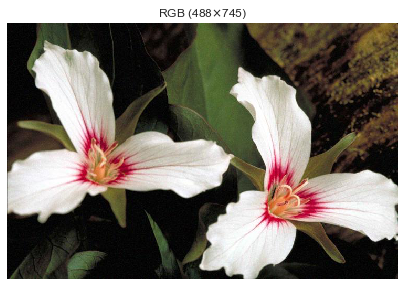

In [4]:
plt.figure(figsize=(7,5))
plt.imshow(img)
plt.title(r'RGB ({}$\times${})'.format(m,n))
plt.axis('off');

## Image Transformation

We transform images by applying some transformation function $T$ on the original image matrix $f(x,y)$, such that,

$$g(x,y) = T(f(x,y))\tag{1}$$

where $g(x,y)$ is the transformed image.

### Grayscale

To transform the RGB image to grayscale, we write the function `rgb2gray` based on the MATLAB function of the same name.

In [5]:
def rgb2gray(img):
    transform = np.array([0.2989, 0.5870, 0.1140])
    return np.dot(img[:,:,:3], transform)

We also write the following function for side-by-side image comparison:

In [6]:
def compare_images(img1, img2, t1, t2):
    img = [img1, img2]
    t = [t1, t2]
    fig = plt.figure(figsize=(10,5))
    ax = [fig.add_subplot(1,2,i+1) for i in range(2)]
    for i in range(2):
        m, n = img[i].shape[:2]
        ax[i].set_title(r'{} ({}$\times${})'.format(t[i], m, n))
        ax[i].imshow(img[i], cmap='gray')
        ax[i].axis('off')
    plt.tight_layout();
    return None

Below, we transform the image to grayscale.

In [7]:
gray = rgb2gray(img)

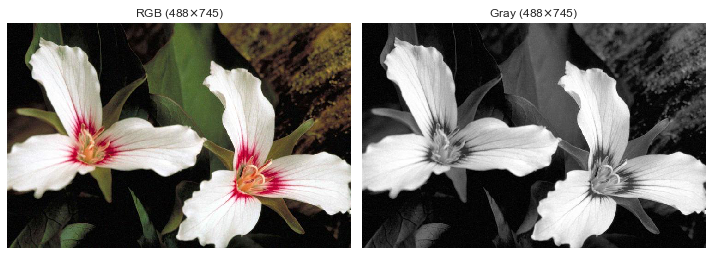

In [8]:
compare_images(img, gray, 'RGB', 'Gray')

### Resizing

We can use the `resize` function from the `skimage.transform` to resize the original image. Below, we reduce the image to a quarter of its original size.

In [9]:
img4 = np.round(
    resize(img, (np.ceil(m/4), np.ceil(n/4)), order=1, preserve_range=True)
).astype(int)

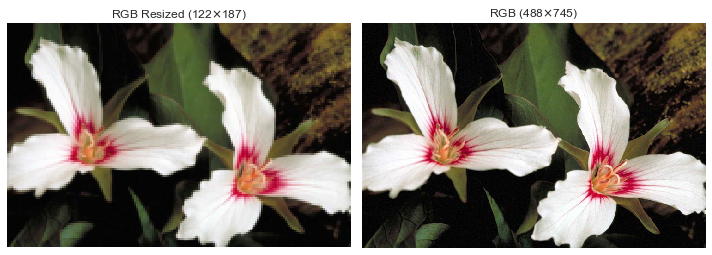

In [10]:
compare_images(img4, img, 'RGB Resized', 'RGB')

Note that we display the resized image at the same size to emphasize pixelation/reduced resolution.

### Thresholding

We write the following function to display the image pixel intensity histogram (left) and the image (right) side-by-side.

In [11]:
def plot_hist(img, title):
    fig, ax = plt.subplots(ncols=2, figsize=(11, 4))
    sns.set(color_codes=True)
    ax[0].hist(img.flatten(), bins=30)
    ax[0].set(xlim=(0,255))
    ax[0].set_ylabel('Count', size=13)
    ax[0].set_xlabel('Pixel Intensity', size=13)
    ax[1].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax[1].set_title(title)
    ax[1].axis('off')
    plt.tight_layout();
    return None

Using the original grayscale image, the function works as follows:

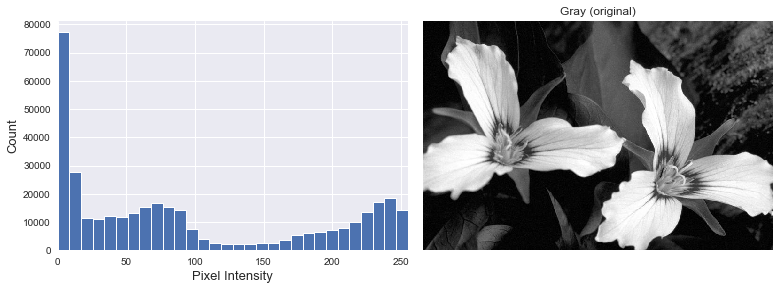

In [12]:
plot_hist(gray, 'Gray (original)')

We use thresholding to partition an image into two parts (black/white) to better distinguish objects in the image (e.g., foreground/background). The thresholding transformation function is 

$$g(x,y) = T(f(x,y)) = \begin{cases}
255 & \text{if } f(x,y) > p\\
0 & \text{if } f(x,y) \leq p
\end{cases}\tag{2}$$

where $p$ is some threshold value. Below, we transform the grayscale image using $p=150$.

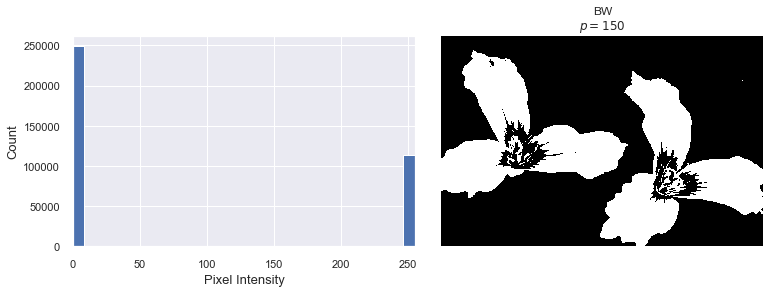

In [13]:
p = 150
bw = np.where(gray > p, 255, 0)
plot_hist(bw, 'BW\n$p=150$')

### Histogram Shift

A histogram shift is used to adjust the brightness of an image by increasing/decreasing pixel intensity (e.g., lighten/darken). The transformation function for a histogram shift is defined by

$$g(x,y) = T(f(x,y)) = \begin{cases}
U & \text{if } f(x,y) > U - s\\
L & \text{if } f(x,y) < L - s\\
f(x,y) + s & \text{otherwise}
\end{cases}\tag{3}$$

where $L$ is a lower bound, $U$ is an upper bound, and $s$ a shift value. Below, we shift the histogram of the grayscale image using a lower bound of 25, upper bound of 225, and a shift of 50.

In [14]:
L, U, s = 25, 225, 50
hs = np.where(gray > (U - s), U, gray + s)
hs = np.where(hs <= (L - s), L, hs)

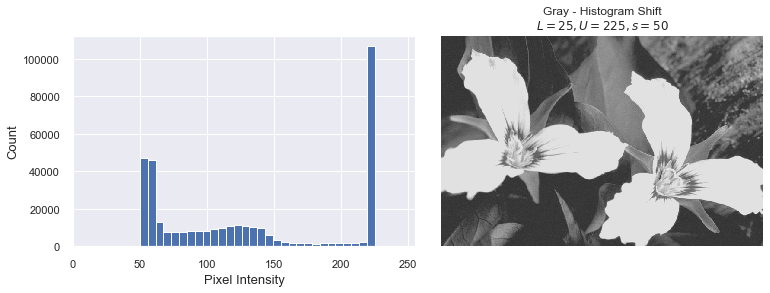

In [15]:
plot_hist(hs, 'Gray - Histogram Shift\n$L=25, U=225, s=50$')

### Histogram stretch

A histogram stretch transformation is used to alter the contrast of an image; making the details of image objects more/less visible. The transformation function is

$$g(x,y) = T(f(x,y)) = \left( \frac{f(x,y) - \min (f(x,y))}{\max (f(x,y)) - \min (f(x,y))} \right)\lambda \tag{4}$$

where $\lambda$ is a stretch parameter. We apply the histogram stretch transformation on the grayscale image below using $\lambda=205$.

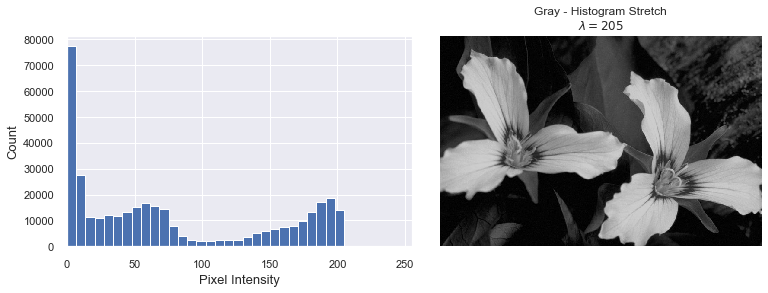

In [16]:
lamb = 205
stretch = ((gray - np.min(gray)) / (np.max(gray) - np.min(gray))) * lamb
plot_hist(stretch, 'Gray - Histogram Stretch\n$\lambda = 205$')

### Gray Level (Log)

A gray level log transformation is used to enhance image brightness by increasing the relative intensity of dark pixels. The transformation function is given by

$$g(x,y) = T(f(x,y)) = c \log (f(x,y)+1)\tag{5}$$

where $c$ is a scaling parameter that determines the level of brightness. We apply the log transformation to the grayscale image as follows using $c=40$.

In [17]:
c = 40
logt = c*np.log1p(gray)

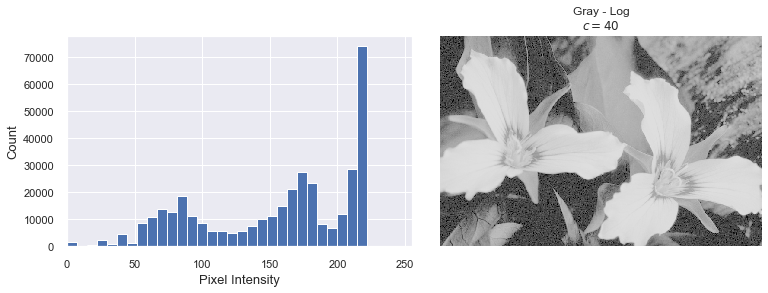

In [18]:
plot_hist(logt, 'Gray - Log\n$c = 40$')

### Gray Level (Power-Law)

A gray level power-law transformation is used to enhance image brightness by decreasing the relative intensity of light pixels. The transformation function is given by

$$g(x,y) = T(f(x,y)) = c f(x,y)^\gamma \tag{6}$$

where $c$ and $\gamma$ are scaling parameters. We apply the power-law transformation to the grayscale image as follows using $c=0.1$ and $\gamma=1.4$.

In [19]:
c, gamma = 0.1, 1.4
powerlaw = c * np.power(gray, gamma)

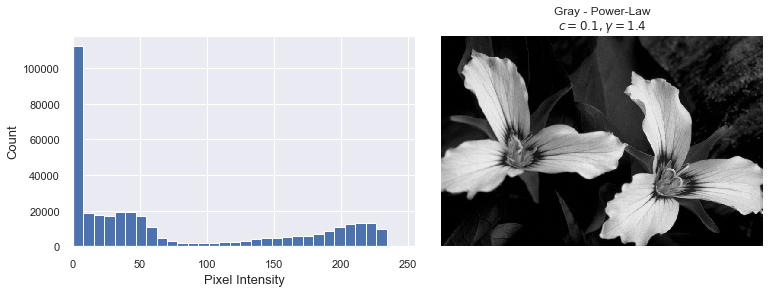

In [20]:
plot_hist(powerlaw, 'Gray - Power-Law\n$c = 0.1, \gamma = 1.4$')

## Image Convolution

Convolution is an image processing method that can be used for edge detection, denoising, blurring, embossing, sharpening, etc. We typically perform image convolution using convolution masks, also known as kernels or convolution matrices.

The functions written below are used to apply a given convolution mask to an image. 

In [21]:
def convolution_mask(mask, img, p):
    m, n = mask.shape
    pad = (m//2, n//2)
    z = (0, 0)
    cmasks = []
    for k in range(p):
        cmask = np.zeros((m,n,p))
        for i in range(m):
            for j in range(n):
                cmask[i,j,k] = mask[i,j]
        cmasks.append(cmask)

    padimg = np.pad(img, (pad, pad, z), 'constant', constant_values=(z, z, z))
    return padimg, cmasks

In [22]:
def image_convolution(img, mask, div=1):
    m, n = img.shape[:2]
    p = 3
    padimg, cmasks = convolution_mask(mask, img, p)
    mi, nj = cmasks[0].shape[:2]
    conv_img = np.zeros((m,n,p))
    for k in range(p):
        for i in range(m):
            for j in range(n):
                conv_img[i,j,k] = (
                    padimg[0+i:mi+i, 0+j:nj+j, k] * cmasks[k][:,:,k]).sum()
    conv_img = conv_img/div
    return np.round(conv_img,0).astype(int)

### Blurring Mask

$$\frac{1}{256} \ \begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4 \\ 1 & 4 & 6 & 4 & 1 \end{bmatrix}$$

In [23]:
blur = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
    ])

blur_img = image_convolution(img, blur, div=256)

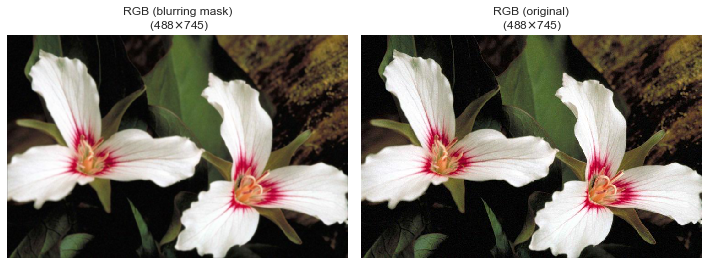

In [24]:
compare_images(blur_img, img, 'RGB (blurring mask)\n', 'RGB (original)\n')

### Sharpening Mask

$$\begin{bmatrix} -1 & -1 & -1 \\ -1 & 9 & -1 \\ -1 & -1 & -1 \end{bmatrix}$$

In [25]:
sharpen = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
    ])

sharpen_img = image_convolution(img, sharpen)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


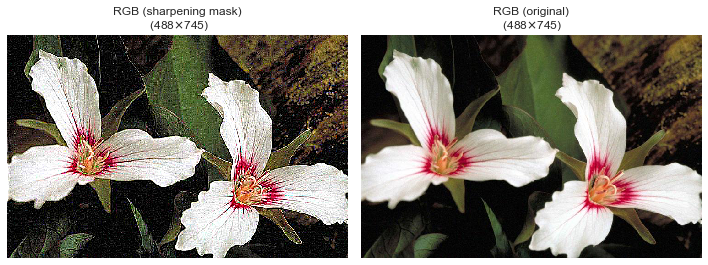

In [26]:
compare_images(sharpen_img, img, 'RGB (sharpening mask)\n', 'RGB (original)\n')

### Embossing Mask

$$\begin{bmatrix} -1 & -1 & -1 & -1 & 0 \\ -1 & -1 & -1 & 0 & 1 \\ -1 & -1 & 0 & 1 & 1 \\ -1 & 0 & 1 & 1 & 1 \\ 0 & 1 & 1 & 1 & 1 \end{bmatrix}$$

In [27]:
emboss = np.array([
    [-1, -1, -1, -1, 0],
    [-1, -1, -1, 0, 1],
    [-1, -1, 0, 1, 1],
    [-1, 0, 1, 1, 1],
    [0, 1, 1, 1, 1]
    ])

emboss_img = image_convolution(img, emboss)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


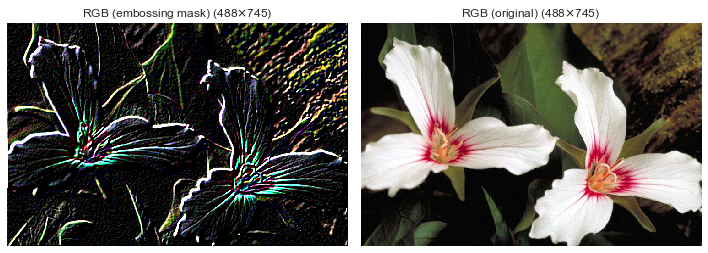

In [28]:
compare_images(emboss_img, img, 'RGB (embossing mask)','RGB (original)')

### Edge Detection Mask

$$\begin{bmatrix} -1 & 0 & 0 & 0 & 0 \\ 0 & -2 & 0 & 0 & 0 \\ 0 & 0 & 6 & 0 & 0 \\ 0 & 0 & 0 & -2 & 0 \\ 0 & 0 & 0 & 0 & -1 \end{bmatrix}$$

In [29]:
edges = np.array([
    [-1, 0, 0, 0, 0],
    [0, -2, 0, 0, 0],
    [0, 0, 6, 0, 0],
    [0, 0, 0, -2, 0],
    [0, 0, 0, 0, -1]
    ])

edges_img = image_convolution(img, edges)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


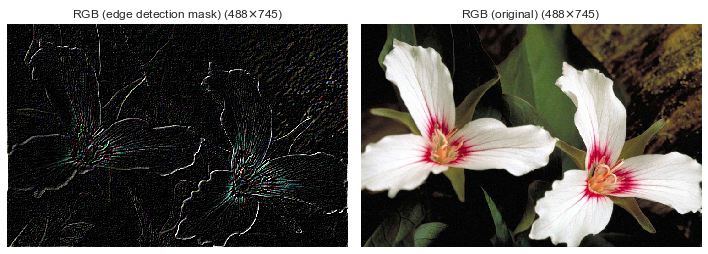

In [30]:
compare_images(edges_img, img, 'RGB (edge detection mask)', 'RGB (original)')

## Image Segmentation

### Otsu's Method

We can determien the optimal pixel threshold value to use when transforming a grayscale images to black and white using Otsu's method. The total variance in pixel intensity of an $m \times n$ gray image is

$$\sigma^2_T = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}(x_{ij}-\mu_T)^{2}\tag{7}$$

where $x_{ij}$ is the intensity of pixel $(i,j)$, $i = 1,\dots,m$ and $j = 1,\dots,n$ and $\mu_T$ is the average image pixel intensity.

Otsu’s method aims to find an optimal pixel threshold $t$ that separates an image into two classes (black/white). We do this by minimizing the intra(within)-class variance,

$$\sigma^2_w(t) = \omega_1(t)\sigma^2_1(t) + \omega_2(t)\sigma^2_2(t)\tag{8}$$

where $\omega_i(t)$ is the proportion of pixels in class $i$, $\sigma_i^2$ is the variance of class $i$, and $i = 1, 2$.

Alternatively, this minimization problem can be viewed as maximizing the inter(between)-class variance,

$$\sigma^2_b(t)=\sigma^2_T - \sigma^2_w(t)\tag{9}$$

which is equivalent to

$$\sigma^2_b(t)=\omega_1(t)\omega_2(t)\big[\mu_1(t) - \mu_2(t)\big]^2\tag{10}$$

where $\mu_i(t)$ is the average intensity of class $i$, $i = 1, 2$.

#### Proof

Because $\omega_i(t)$ is the proportion of pixels in class $i$, $i = 1, 2$, we know that 

$$\sum_{i=1}^{2}\omega_i(t)=\omega_1(t)+\omega_2(t)=1 \tag{11}$$

The average intensity of an image, $\mu_T$, can be written as a linear combination of $\omega_i(t)$ and $\mu_i(t)$:

$$\mu_T = \frac{1}{mn}\sum_{i=1}^{m}\sum_{j=1}^{n}x_{ij} = \sum_{i=1}^{2} \omega_i(t)\mu_i(t) = \omega_1(t)\mu_1(t) + \omega_2(t)\mu_2(t)\tag{12}$$

We can express the inter-class variance as the proportionally weighted squared distance between the average intensity of class $i$ and the average intensity of the image, such that,

$$\sigma_b^2(t) = \sum_{i=1}^{2} \omega_i(t)\big[\mu_i(t)-\mu_T\big]^2 = \omega_1(t)\big[\mu_1(t)-\mu_{T}\big]^2 + \omega_2(t)\big[\mu_2(t)-\mu_{T}\big]^2\tag{13}$$

Using (11) and (12), we prove (13) is equivalent to (10) as follows:

$$\begin{aligned}
\sigma_b^2(t) &= \omega_1(t)\big[\mu_1(t)-\mu_{T}\big]^2 + \omega_2(t)\big[\mu_2(t)-\mu_{T}\big]^2\\
&= \omega_1(t)\big[\mu_1(t)-\omega_1(t)\mu_1(t)-\omega_2(t)\mu_2(t)\big]^2 + \omega_2(t)\big[\mu_2(t)-\omega_1(t)\mu_1(t)-\omega_2(t)\mu_2(t)\big]^2\\
 &= \omega_1(t)\big[\big(1-\omega_1(t)\big)\mu_1(t)-\omega_2(t)\mu_2(t)\big]^2 + \omega_2(t)\big[\big(1-\omega_2(t)\big)\mu_2(t)-\omega_1(t)\mu_1(t)\big]^2\\
&= \omega_1(t)\big[\omega_2(t)\mu_1(t)-\omega_2(t)\mu_2(t)\big]^2 + \omega_2(t)\big[\omega_1(t)\mu_2(t)-\omega_1(t)\mu_1(t)\big]^2\\
 &= \omega_1(t)\big[\omega_2(t)[\mu_1(t)-\mu_2(t)]\big]^2 + \omega_2(t)\big[\omega_1(t)[\mu_2(t)-\mu_1(t)]\big]^2\\
 &= \omega_1(t)\omega_2^2(t)\big[\mu_1(t)-\mu_2(t)\big]^2 + \omega_2(t)\omega_1^2(t)\big[\mu_2(t)-\mu_1(t)\big]^2\\
 &= \omega_1(t)\omega_2(t)\big[\omega_2(t)[\mu_1(t)-\mu_2(t)]^2 + \omega_1(t)[\mu_2(t)-\mu_1(t)]^2\big]\\
&= \omega_1(t)\omega_2(t)\big[\mu_1(t)-\mu_2(t)\big]^2\big[\omega_2(t) + \omega_1(t)\big]\\
\sigma_b^2(t) &= \omega_1(t)\omega_2(t)\big[\mu_1(t)-\mu_2(t)\big]^2
\end{aligned}$$

#### Application

Since forming an optimization problem computing class means (between-class) is far more efficient than one computing class variances (within-class), Otsu's method aims to identify the optimal $t$ by maximizing the between-class variance. In the first function below, we use Otsu's method on our grayscale image by testing threshold values $t=1,2,\dots,254$. The function returns the thresholds tested, the between-class variance $\sigma^2_b(t)$ at each threshold, the optimal threshold, and the resulting BW image when using the optimal threshold. The second function takes in the list of thresholds, the between-class variance $\sigma^2_b(t)$ at each threshold, and an image, returning a histogram (left) and the image (right). The histogram shows the distribution of pixel intensities for the image as well as a line plot showing the between-class variance (times 10), $\sigma^2_b(t) \times 10$, as a function of the threshold $t$.

In [31]:
def otsu_method(gray):
    m, n = gray.shape
    thresh = np.arange(1,255)
    bcv = np.zeros(len(thresh))
    for t in thresh:
        w1 = (gray >= t).sum() / (m*n)
        w2 = 1 - w1
        mu1 = gray[np.where(gray >= t)].mean()
        mu2 = gray[np.where(gray < t)].mean()
        bcv[t-1] = (w1*w2) * np.power(mu1 - mu2, 2)
    thresh_img = np.where(gray >= thresh[np.argmax(bcv)], 255, 0)
    print('Optimal threshold: ' + str(thresh[np.argmax(bcv)]))
    return thresh, bcv, thresh[np.argmax(bcv)], thresh_img

In [32]:
def plot_hist_bcv(thresh, bcv, img, title):
    fig, ax = plt.subplots(ncols=2, figsize=(11, 4))
    sns.set(color_codes=True)
    ax[0].hist(img.flatten(), bins=30)
    ax[0].set(xlim=(0,255))
    ax[0].plot(thresh, bcv*10)
    ax[0].set_ylabel(r'Count  /  $\sigma^2_b(t) \times 10$', size=13)
    ax[0].set_xlabel('Pixel Intensity  /  $t$', size=13)
    ax[1].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=255)
    ax[1].set_title(title)
    ax[1].axis('off')
    plt.tight_layout();
    return None

Using the gray image, the function for Otsu's method is run below.

In [33]:
thresh, bcv, optimal, thresh_img = otsu_method(gray)

Optimal threshold: 126


As shown above, Otsu's method returned an optimal threshold value of $t=126$. Below, the original grayscale image (top right) is shown alongside its pixel intensity histogram (top left), while the optimal threshold $t=126$ BW image (bottom right) is shown alongside its (binary) pixel intensity histogram (bottom left). For reference, the histogram is overlayed with the between-class variance multiplied by 10 as a function of a given threshold, i.e., $\sigma^2_b(t) \times 10$.

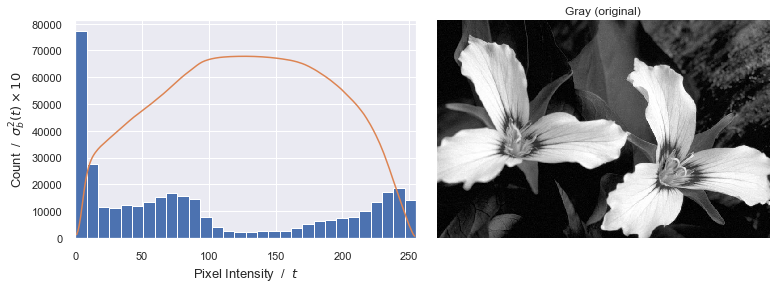

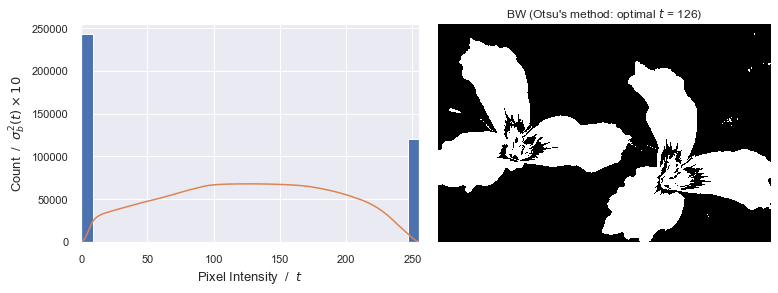

In [34]:
plot_hist_bcv(thresh, bcv, gray, 'Gray (original)')
plot_hist_bcv(thresh, bcv, thresh_img,
          "BW (Otsu's method: optimal $t$ = {})".format(optimal))

### K-means Clustering

For the RGB image, we can use the $K$-means clustering algorithm for image segmentation. In the first function below, we use `KMeans` in the `sklearn.cluster` module to segment the image into `n_clusters`. Cluster centers and labels are obtained and used to define the color of pixel $(i,j)$. The second function below takes in the original RGB image and a list of clusters; utilizing `kmeans_algo` to return the K-means segmented images.

In [35]:
def kmeans_algo(img, n_clusters):
    m, n = img.shape[:2]
    X = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    centers = np.round(kmeans.cluster_centers_, 0)
    labels = kmeans.labels_.reshape((m,n))
    kmeans_img = np.zeros((m,n,3))
    for i in range(m):
        for j in range(n):
            kmeans_img[i,j,:] = centers[labels[i,j]]
    return kmeans_img.astype(int)

In [36]:
def kmeans_imgs(img, clusters):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))
    for i, n_clusters in enumerate(clusters):
        kmeans_img = kmeans_algo(img, n_clusters)
        ax[i//2, i%2].imshow(kmeans_img, vmin=0, vmax=255)
        ax[i//2, i%2].set_title(
            'K-means RGB (K = {} clusters)'.format(n_clusters))
        ax[i//2, i%2].axis('off')
    plt.tight_layout();
    return None

We run the algorithm below to return the images using 2, 3, 4, and 5 clusters.

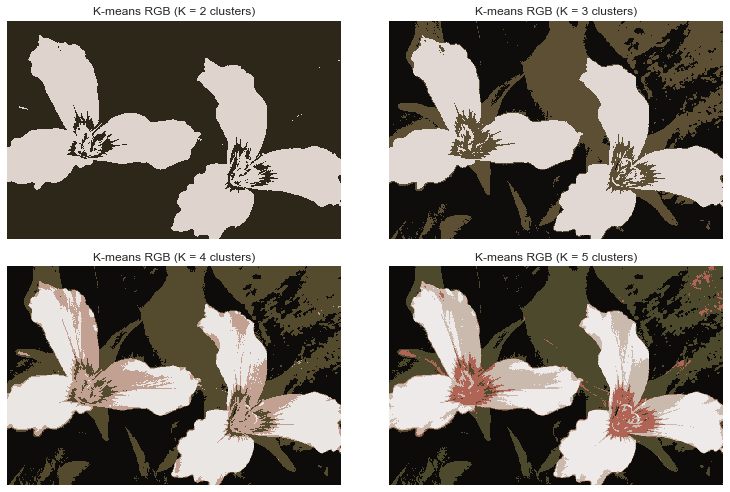

In [37]:
clusters = [2, 3, 4, 5]
kmeans_imgs(img, clusters)

## Edge Detection

### Sobel Operators

Sobel operators are basic kernels (convolution masks) that can be used for edge detection (others include Krisch, Prewitt, Laplacian, etc.). The Sobel operators are given by

$$M_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} \quad\quad\quad M_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}\tag{14}$$

where $M_x$ and $M_y$ detect the horizontal and vertical edges of an image, respectively. Notice above that each operator is the others transpose, i.e., $M_x = M_y^\textsf{T}$. In the following two functions, we pad the input image and apply the Sobel operator as a convolution mask.

In [38]:
def pad_image(mask, img):
    m, n = mask.shape
    pad = (m//2, n//2)
    z = (0, 0)
    padimg = np.pad(img, (pad, pad), 'constant', constant_values=(z, z))
    return padimg

In [39]:
def gray_convolution(img, mask, div=1):
    m, n = img.shape
    mi, nj = mask.shape
    padimg = pad_image(mask, img)
    conv_img = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            conv_img[i,j] = (padimg[0+i:mi+i, 0+j:nj+j] * mask).sum()
    return conv_img / div

Below, we define the vertical and horizontal Sobel operators and apply the convolution of these masks with the grayscale image to identify its vertical $f_x$ and horizontal $f_y$ edges.

In [40]:
Mx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
My = Mx.T

In [41]:
fx = gray_convolution(gray, Mx)
fy = gray_convolution(gray, My)

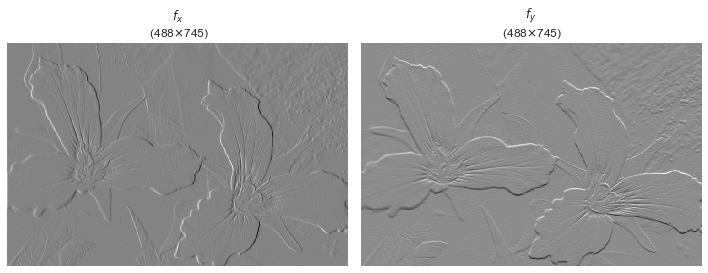

In [42]:
compare_images(fx, fy, '$f_x$\n', '$f_y$\n')

Here we define the combined edge detected image $f$ as the root sum of squared vertical and horizontal edges, such that,

$$f = \sqrt{f_x^2 + f_y^2}\tag{15}$$

In [43]:
f = np.sqrt(np.power(fx, 2) + np.power(fy, 2))

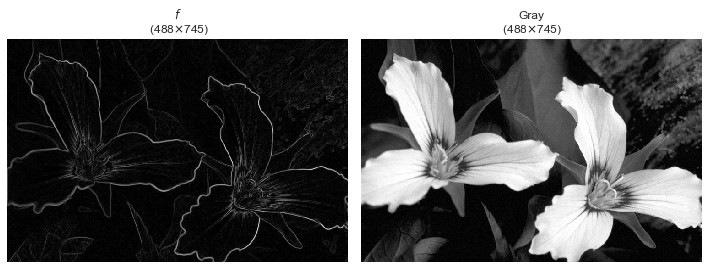

In [44]:
compare_images(f, gray, '$f$\n', 'Gray\n')

We can also use thresholding to define the edges by applying a cutoff value $p$, such that,

$$\hat{f} = \begin{cases}
255 & \text{if } f > p\\
0 & \text{if } f \leq p
\end{cases}\tag{16}$$

where $\hat{f}$ is the estimated edge detection image. Increasing the threshold value decreases the number of edge pixels, such that only those pixels with an intensity greater than the threshold are considered edges. We test out the threshold values $p=\{50,150,200,250,300,500\}$ below.

In [45]:
ps = [50, 150, 200, 250, 300, 500]
fhat = [np.where(f > p, 255, 0) for p in ps]

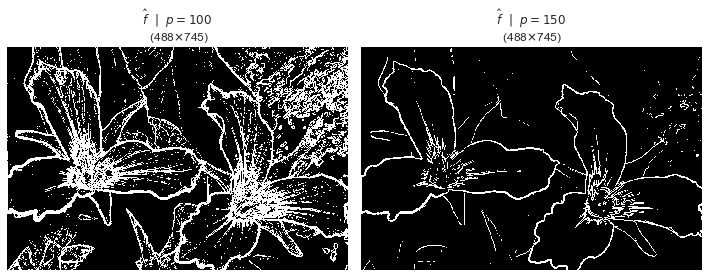

In [46]:
compare_images(fhat[0], fhat[1], '$\hat{f} \ \ | \ \ p = 100$\n',
               '$\hat{f} \ \ | \ \ p = 150$\n')

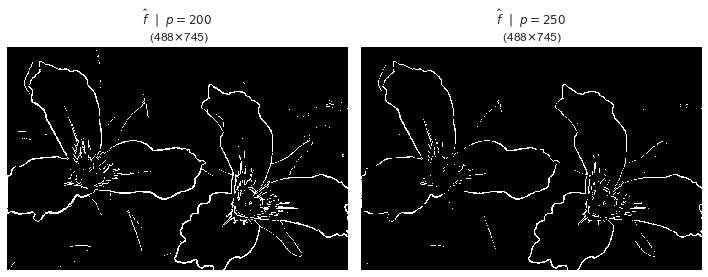

In [47]:
compare_images(fhat[2], fhat[3], '$\hat{f} \ \ | \ \ p = 200$\n',
               '$\hat{f} \ \ | \ \ p = 250$\n')

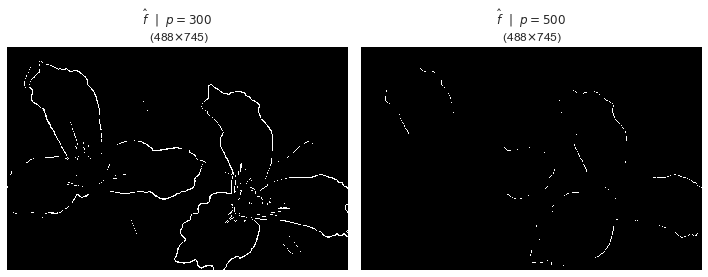

In [48]:
compare_images(fhat[4], fhat[5], '$\hat{f} \ \ | \ \ p = 300$\n',
               '$\hat{f} \ \ | \ \ p = 500$\n')

### Canny Edge Detector

Gradient operators, like those used in Sobel edge detection, may be used to identify the image border. However, these operators increase the width of edges and can easily be corrupted by noise. The proposed multiple detection method by Canny attempts to account for these issues. Here, we code our own version of the Canny edge detection algorithm using the grayscale image $f(i,j)$, where $i = 0,\dots,m-1$ and $j = 0,\dots,n-1$.

Prior to edge detection we apply a Gaussian filter $h$ to the original image $f$ to create a smoothed image $f_s$. We define the Gaussian filter as

$$h = \frac{1}{1115} \ \begin{bmatrix} 1 & 4 & 7 & 10 & 7 & 4 & 1 \\ 4 & 12 & 26 & 33 & 26 & 12 & 4 \\ 7 & 26 & 55 & 71 & 55 & 26 & 7 \\ 10 & 33 & 71 & 91 & 71 & 33 & 10 \\ 7 & 26 & 55 & 71 & 55 & 26 & 7 \\ 4 & 12 & 26 & 33 & 26 & 12 & 4 \\ 1 & 4 & 7 & 10 & 7 & 4 & 1 \end{bmatrix}\tag{17}$$

#### Gaussian Smoothing

The Gaussian filter $h$ is defined in code below and the previously defined function `gray_convolution` is used to apply the filter and return the smoothed image $f_s$.

In [49]:
h = np.array([
    [1, 4, 7, 10, 7, 4, 1],
    [4, 12, 26, 33, 26, 12, 4],
    [7, 26, 55, 71, 55, 26, 7],
    [10, 33, 71, 91, 71, 33, 10],
    [7, 26, 55, 71, 55, 26, 7],
    [4, 12, 26, 33, 26, 12, 4],
    [1, 4, 7, 10, 7, 4, 1]
])
fs = gray_convolution(gray, h, div=1115)

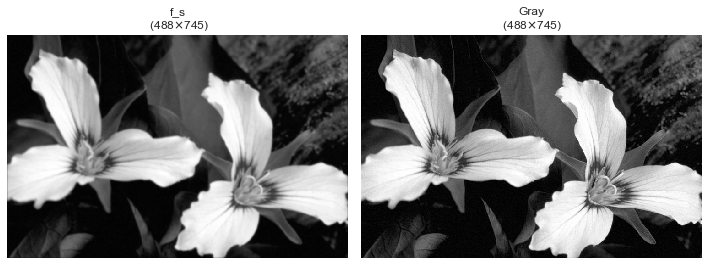

In [50]:
compare_images(fs, gray, 'f_s\n', 'Gray\n')

#### Gradient Magnitude and Direction

We compute the gradient magnitude $G(i, j)$ and the gradient direction $\theta(i, j)$ for the $(i,j)$th pixel of $f_s$ using

$$G(i,j) = \sqrt{\left( \frac{\partial f_s(i,j)}{\partial x} \right)^2 + \left( \frac{\partial f_s(i,j)}{\partial y}\right)^2}\tag{18}$$

$$\theta(i,j) = \arctan{\left( \frac{\dfrac{\partial f_s(i,j)}{\partial y}}{\dfrac{\partial f_s(i,j)}{\partial x}} \right)}\tag{19}$$

where the discrete approximation formulas of (18) and (19) are given by

$$\frac{\partial f_s(i,j)}{\partial x} = \frac{1}{2} \big[ f_s(i+1,j)−f_s(i,j)+f_s(i+1,j+1)−f_s(i,j+1) \big]\tag{20}$$

$$\frac{\partial f_s(i,j)}{\partial y} = \frac{1}{2} \big[ f_s(i,j+1)−f_s(i,j)+f_s(i+1,j+1)−f_s(i+1,j) \big]\tag{21}$$

Below, we define a new padding function `canny_pad`. In addition, we define the function `discrete_approx`, which computes the descrete approximation of vertical and horizontal pixels $(i,j)$ in $f_s$ according the equations (20) and (21).

In [51]:
def canny_pad(X, isphi=False):
    m, n = X.shape
    zm = np
    if isphi == True:
        zrow = np.zeros((1,n))
        zcol = np.zeros((m+2,1))
        X = np.r_[zrow, X, zrow]
        X = np.c_[zcol, X, zcol]
        return X
    else:
        X = np.r_[X, X[-1:,:]]
        X = np.c_[X, X[:,-1:]]
        return X

In [52]:
def discrete_approx(fs):
    m, n = fs.shape
    fs = canny_pad(fs)
    dfsx = np.zeros((m,n))
    dfsy = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            dfsx[i,j] = fs[i+1,j] - fs[i,j] + fs[i+1,j+1] - fs[i,j+1]
            dfsy[i,j] = fs[i,j+1] - fs[i,j] + fs[i+1,j+1] - fs[i+1,j]
    return dfsx/2, dfsy/2 

In [53]:
dfsx, dfsy = discrete_approx(fs)

Using the approximate discrete vertical and horizontal partial derivatives defined above, we compute the approximate gradient magnitude $G(i, j)$ and direction $\theta(i, j)$ of each pixel $(i,j)$ in the smoothed image $f_s$ as follows.

In [54]:
G = np.sqrt(np.power(dfsx, 2) + np.power(dfsy, 2))
theta = np.arctan(dfsx, dfsy)

Images portraying the gradient magnitude (left) and gradient direction (right) are shown below.

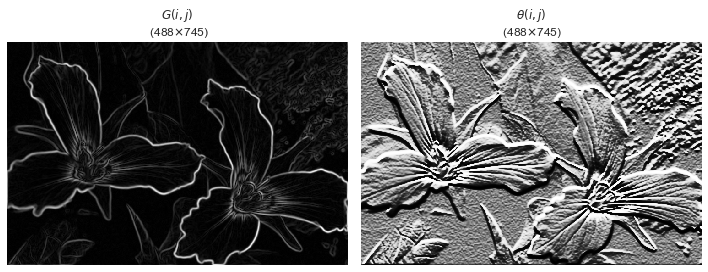

In [55]:
compare_images(G, theta, '$G(i,j)$\n', r'$\theta(i,j)$' + '\n')

![](fig/fig1.png)

$$\textbf{Figure 1}. \text{ Neighbor of the pixel } (i,j) \text{ and gradient directions.}$$

#### Non-maximal Suppression

The Canny edge detection algorithm uses nonmaximal suppression to determine the edge pixels of an image. For a pixel to be considered an edge its gradient magnitude must be a local maximum in the gradient direction. To do this, we compare the gradient magnitude of the pixel of interest at point $(i, j)$ with the gradient magnitudes of its two neighboring pizels at positions $(i_1,j_1)$ and $(i_2,j_2)$. If the gradient magnitude of the pixel of interest is greater than the gradient magnitude of its neighbors, we label this pixel as an edge point and use its gradient magnitude as the pixel intensity. If the pixel is not an edge point, we set the pixel intensity to zero. The resulting image $\phi$ can be described as follows:

$$\phi(i,j) = \begin{cases} G(i,j) & \text{if } G(i,j) \geq G(i_1,j_1) \text{ and } G(i,j) \geq G(i_2,j_2) \\ 0 & \text{otherwise} \end{cases}\tag{22}$$

We must also quantize the gradient directions because pixel location is discrete. Using the pixel neighbor domain in Figure 1, the positions $(i_1,j_1)$ and $(i_2,j_2)$, denoting the neighboring pixels of the pixel of interest at point $(i,j)$ in the gradient direction, can be computed as follows:

If $-\dfrac{1}{8}\pi \leq \theta(i,j) \leq \dfrac{1}{8}\pi$,

- $\theta(i,j)$ is quantized as $0$, and $(i_1,j_1)=(i,j−1), \ (i_2,j_2)=(i,j+1)$

If $\dfrac{1}{8}\pi \leq \theta(i,j) \leq \dfrac{3}{8}\pi$,

- $\theta(i,j)$ is quantized as $\dfrac{1}{4}\pi$, and $(i_1,j_1)=(i+1,j-1), \ (i_2,j_2)=(i-1,j+1)$


If $-\dfrac{3}{8}\pi \leq \theta(i,j) \leq -\dfrac{1}{8}\pi$,

- $\theta(i,j)$ is quantized as $-\dfrac{1}{4}\pi$, and $(i_1,j_1)=(i-1,j−1), \ (i_2,j_2)=(i+1,j+1)$

If $\dfrac{3}{8}\pi \leq \theta(i,j) \leq \dfrac{1}{2}\pi$ or $-\dfrac{1}{2}\pi \leq \theta(i,j) \leq -\dfrac{3}{8}\pi$,

- $\theta(i,j)$ is quantized as $\dfrac{1}{2}\pi$, and $(i_1,j_1)=(i-1,j), \ (i_2,j_2)=(i+1,j)$

Below, we define the nonmaximal suppression function, which returns the suppressed image $\phi$. The function identifies the two neighboring pixels, $p_1$ and $p_2$, of the $G$ using the quantized values of the gradient direction matrix $\theta$.

In [56]:
def nonmaximal_suppression(X, theta):
    m, n = X.shape
    phi = np.zeros((m,n))
    pi = np.pi
    for i in range(1, m-1):
        for j in range(1, n-1):
            if (-1/8*pi <= theta[i,j] <= 1/8*pi):
                p1, p2 = X[i, j-1], X[i, j+1]
            elif (1/8*pi <= theta[i,j] <= 3/8*pi):
                p1, p2 = X[i+1, j-1], X[i-1, j+1]
            elif (-3/8*pi <= theta[i,j] <= -1/8*pi):
                p1, p2 = X[i-1, j-1], X[i+1, j+1]
            elif (3/8*pi <= theta[i,j] <= 1/2*pi or
                    -1/2*pi <= theta[i,j] <= -3/8*pi):
                p1, p2 = X[i-1, j], X[i+1, j]
            try:
                if (X[i,j] >= p1) and (X[i,j] >= p2):
                    phi[i,j] = X[i,j]
                else:
                    phi[i,j] = 0
            except IndexError:
                pass
    return phi

The suppressed image $\phi$ is defined and shown below.

In [57]:
phi = nonmaximal_suppression(G, theta)

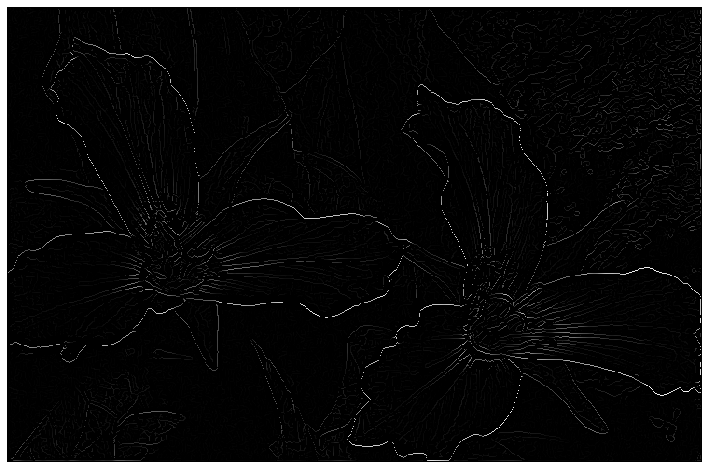

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(phi, cmap='gray')
plt.axis('off')
plt.tight_layout();

#### Hysteresis Thresholding

Because non-maximal suppression reduces edges to a width of just one pixel, image noise may result in inconsistent responses. We refer to this as streaking; where the contour line of an edge fluctuates above and below the threshold. Hysteresis is a method that can eliminate streaking using two thresholds, $\tau_1$ and $\tau_2$, where $\tau_1 < \tau_2$. With this method, if the value $\phi(i,j)$ is larger than $\tau_2$, the pixel we consider the pixel an edge. In addition, any pixel connected to this edge pixel with a value larger than $\tau_1$ is also considered an edge.

In the first function below we define $\Omega(i,j)$ as the 8 neighboring pixels of a pixel at point $(i,j)$. This is used by the following function `threshold_hysteresis`, which defines any $\phi(i,j)$ as an edge if the intensity of $\phi(i,j)$ is greater than or equal to the threshold $\tau_2$. Pixels can also be defined as an edge if $\phi(i,j)$ is greater than or equal to some lower threshold $\tau_1$ **and** $\phi(i,j)$ has a neighboring pixel $\Omega(i,j)$ with intensity greater than or equal to $\tau_2$. Otherwise, the pixel $\phi(i,j)$ is not considered to be an edge and its intensity is set to zero.

In [59]:
def get_omega(i, j):
    oi = np.array([i-1, i-1, i-1, i, i, i+1, i+1, i+1])
    oj = np.array([j-1, j, j+1, j-1, j+1, j-1, j, j+1])
    return (oi, oj)

In [60]:
def threshold_hysteresis(phi, t1, t2):
    m, n = phi.shape
    p = canny_pad(phi, isphi=True)
    t = np.array([t1, t2])
    E = np.zeros((m+2,n+2))
    
    for i in range(1, m+1):
        for j in range(1, n+1):
            if p[i,j] >= t[1]:
                E[i,j] = 255
            elif p[i,j] >= t[0]:
                omega = get_omega(i, j)
                edge_ngbrs = np.where(p[omega] >= t[1], 1, 0).sum()
                if edge_ngbrs > 0:
                    E[i,j] = 255
    return E[1:-1,1:-1]

Below, we tune the edges of $\phi$ using hysteresis thresholding with thresholds $\tau_1 = 10.5$ and $\tau_2 = 14.75$. We display the resulting image, $E$, in the following code block.

In [61]:
E = threshold_hysteresis(phi, 10.5, 14.75)

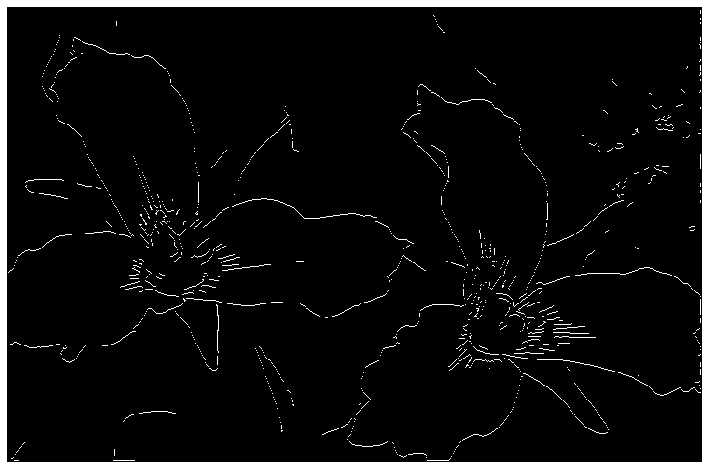

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(E, cmap='gray')
plt.axis('off')
plt.tight_layout();